<a href="https://colab.research.google.com/github/Rk-Pudasaini/Nepal-Data-Insights/blob/main/Demographic_Study_of_Nepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demographic Study Of Nepal
- Population size
- Percent urban population
- Population density
- Population ages 65 and above
- Percent children
- Percent female population
- Rural population, percent
- Age dependency ratio
- Refugee population
- Migrant population
- Population growth


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Rk-Pudasaini/Nepal-Data-Insights/main/Nepal_Development_Indicator_Trends.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Nepal,NPL,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.031891e+00,2.020983e+00,2.146355e+00,2.189230e+00,2.210006e+00,2.285616e+00,NaN,NaN,NaN,NaN
1,Nepal,NPL,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000e+04,2.623000e+06,3.100000e+04,3.840000e+05,1.200000e+04,1.210000e+05,4.800000e+04,3.200000e+04,9.300000e+04,NaN
2,Nepal,NPL,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,3.940887e+01,4.039409e+01,4.482759e+01,4.630542e+01,5.000000e+01,4.830918e+01,5.265701e+01,5.169082e+01,5.362319e+01,NaN
3,Nepal,NPL,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.304457e-01,-4.154308e-01,-2.513827e-01,-1.995158e-01,-1.296913e-01,-1.500543e-01,-8.403878e-02,-8.446476e-02,-4.915940e-02,NaN
4,Nepal,NPL,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.400040e+06,2.850013e+06,4.241244e+06,5.993524e+06,3.263597e+06,5.285142e+06,9.513473e+06,6.433383e+06,3.330281e+06,NaN


In [2]:
df.shape

(1478, 68)

# Extract the Row Information

In [3]:
#Function to extract row informations
def extract_row_info(df, row_index):
    # Extract the specified row of data
    row_data = df.iloc[row_index]

    # Extract the title (Series Name)
    title = row_data['Indicator Name']

    # Extract the data
    data = {col: row_data[col] for col in row_data.index[4:] if row_data[col] not in ('..', 'NaN', '')}

    # Convert numeric values to integers
    data = {col: float(value) if pd.notnull(value) and value not in ('..', 'NaN', '') else None for col, value in data.items()}

    # Extract years and values from the data dictionary
    years = []
    values = []
    for col, value in data.items():
        try:
            year = int(col.split(' ')[0])
            years.append(year)
            values.append(value)
        except ValueError:
            pass

    return title, data, years, values


In [4]:
# Extract information for the current row that has the values for total population in Nepal
title, data, years, values = extract_row_info(df, 215)
print(title)
print(data)

Population, total
{'1960': 10167941.0, '1961': 10365144.0, '1962': 10570716.0, '1963': 10782717.0, '1964': 11002819.0, '1965': 11232951.0, '1966': 11470199.0, '1967': 11715579.0, '1968': 11970411.0, '1969': 12231874.0, '1970': 12501285.0, '1971': 12774870.0, '1972': 13052220.0, '1973': 13335963.0, '1974': 13626301.0, '1975': 13925541.0, '1976': 14230738.0, '1977': 14550430.0, '1978': 14888770.0, '1979': 15238564.0, '1980': 15600442.0, '1981': 15969792.0, '1982': 16347124.0, '1983': 16740664.0, '1984': 17141610.0, '1985': 17540571.0, '1986': 17936926.0, '1987': 18326204.0, '1988': 18720745.0, '1989': 19145077.0, '1990': 19616530.0, '1991': 20130779.0, '1992': 20702133.0, '1993': 21267359.0, '1994': 21794751.0, '1995': 22305571.0, '1996': 22783969.0, '1997': 23249417.0, '1998': 23703328.0, '1999': 24143157.0, '2000': 24559500.0, '2001': 24956071.0, '2002': 25332178.0, '2003': 25682908.0, '2004': 26003965.0, '2005': 26285110.0, '2006': 26518971.0, '2007': 26713655.0, '2008': 26881544.0, '

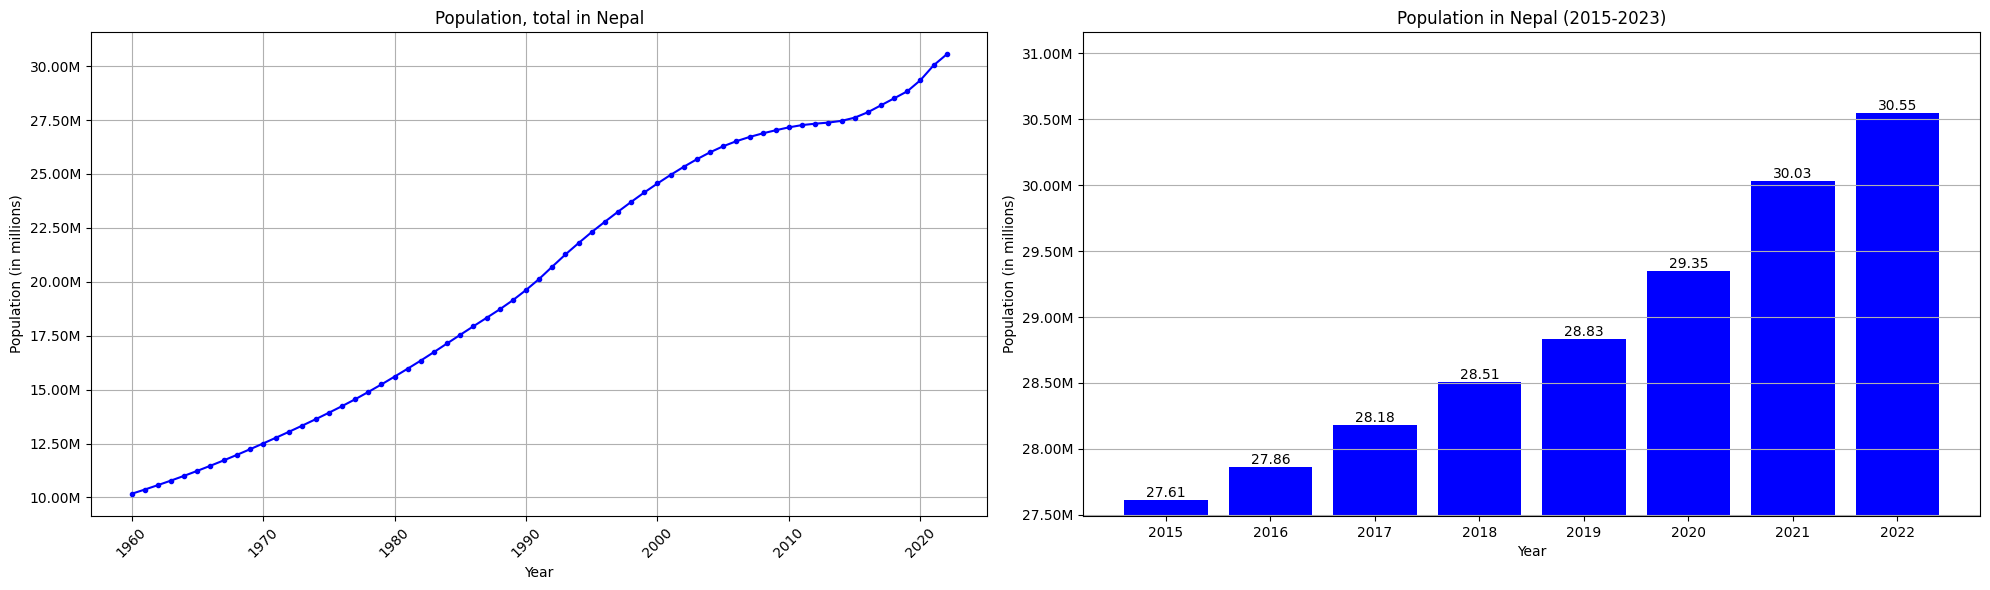

In [5]:
import matplotlib.ticker as ticker

def plot_data(years, values, title, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()

    ax.plot(years, values, marker='.', linestyle='-', color='b')

    ax.set_title(f'{title} in Nepal')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population (in millions)')
    ax.grid(True)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major ticks at intervals of 10 years
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x / 10**6, '.2f')+ 'M'))  # Format y-axis labels

    fig.tight_layout()

    if ax is None:
        plt.show()  # Only show the plot if ax is None

def plot_data_bargraph(data, ax=None):
    years = []
    values = []
    for year, value in data.items():
        if value is not None and int(year) >= 2015:
            years.append(year)
            values.append(value)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()

    bars = ax.bar(years, values, color='b')

    ax.set_title('Population in Nepal (2015-2023)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population (in millions)')
    ax.grid(axis='y')

    # Format the y-axis labels to display values in millions with 2 decimal points
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(x / 10**6, '.2f') + 'M'))

    # Set y-limit based on the maximum value from 2014
    max_value = max(data[str(2014)], max(values))
    ax.set_ylim(max(0, max_value * 0.9), max_value * 1.02)  # Set the y-limit 10% above and below the maximum value

    # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height/ 10**6), ha='center', va='bottom')

    fig.tight_layout()

def plot_variable_and_change_trend_subplots(data):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    plot_data(list(data.keys()), list(data.values()), title, ax=axes[0])
    plot_data_bargraph(data, ax=axes[1])

    plt.tight_layout()
    plt.show()

plot_variable_and_change_trend_subplots(data)

The graph show the total population of Nepal from 1960 to 2022. The population of Nepal in 1960 is around 10 million which now reach to 30.55 million in 2022. The another graph show the bar graph of population fron 2015 to 2022. It shows the recent trend of population in Nepal

# Urban Populations in Nepal

In [6]:
# Extract information for the current row that represent the urban population in Nepal
title, data, years, values = extract_row_info(df, 211)
print(title)
print(data)

Urban population (% of total population)
{'1960': 3.48, '1961': 3.571, '1962': 3.612, '1963': 3.653, '1964': 3.695, '1965': 3.737, '1966': 3.78, '1967': 3.823, '1968': 3.867, '1969': 3.911, '1970': 3.956, '1971': 4.005, '1972': 4.198, '1973': 4.399, '1974': 4.61, '1975': 4.83, '1976': 5.061, '1977': 5.302, '1978': 5.553, '1979': 5.816, '1980': 6.091, '1981': 6.376, '1982': 6.616, '1983': 6.864, '1984': 7.121, '1985': 7.386, '1986': 7.66, '1987': 7.944, '1988': 8.238, '1989': 8.541, '1990': 8.854, '1991': 9.18, '1992': 9.582, '1993': 9.999, '1994': 10.433, '1995': 10.883, '1996': 11.35, '1997': 11.834, '1998': 12.336, '1999': 12.857, '2000': 13.397, '2001': 13.947, '2002': 14.24, '2003': 14.538, '2004': 14.841, '2005': 15.149, '2006': 15.462, '2007': 15.781, '2008': 16.105, '2009': 16.434, '2010': 16.768, '2011': 17.108, '2012': 17.458, '2013': 17.815, '2014': 18.182, '2015': 18.557, '2016': 18.942, '2017': 19.336, '2018': 19.74, '2019': 20.153, '2020': 20.576, '2021': 21.008, '2022': 2

In [7]:
def plot_data_line(data, title, ax=None, xticks_interval=10):
    years = list(data.keys())
    values = list(data.values())

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()

    ax.plot(years, values, marker='.', linestyle='-', color='b')

    ax.set_title(f'{title} in Nepal')
    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.grid(True)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(xticks_interval))  # Set major ticks at specified intervals
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, '.2f')))  # Format y-axis labels

    fig.tight_layout()

    if ax is None:
        plt.show()  # Only show the plot if ax is None

# plot_data_line(data, title, ax=None, xticks_interval=10)

In [15]:
def plot_data_bargraph(data, title, ax=None):
    years = []
    values = []
    for year, value in data.items():
        if value is not None and int(year) >= 2015:
            years.append(year)
            values.append(value)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()

    bars = ax.bar(years, values, color='b')

    ax.set_title(f'{title} in Nepal (2015-2023)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Values')
    ax.grid(axis='y')

    # Format the y-axis labels to display values with 2 decimal points
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, '.2f')))

    # # Set y-limit based on the maximum value from 2014
    # max_value = max(data[str(2014)], max(values))
    # ax.set_ylim(max(0, max_value * 0.85), max_value * 1.02)  # Set the y-limit 10% above and below the maximum value

     # Set y-limit based on the value of 2014
    value_2014 = data.get('2014', 0)
    ax.set_ylim(value_2014 * 0.1, max(values) * 1.02)  # Set the y-limit with lower bound as the value of 2014

    # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height), ha='center', va='bottom')

    fig.tight_layout()

# plot_data_bargraph(data, title, ax=None)


In [9]:
def display_subplots(data, xticks_interval=10):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    plot_data_line(data, title, ax=axes[0], xticks_interval=10)
    plot_data_bargraph(data, title, ax=axes[1])

    plt.tight_layout()
    plt.show()


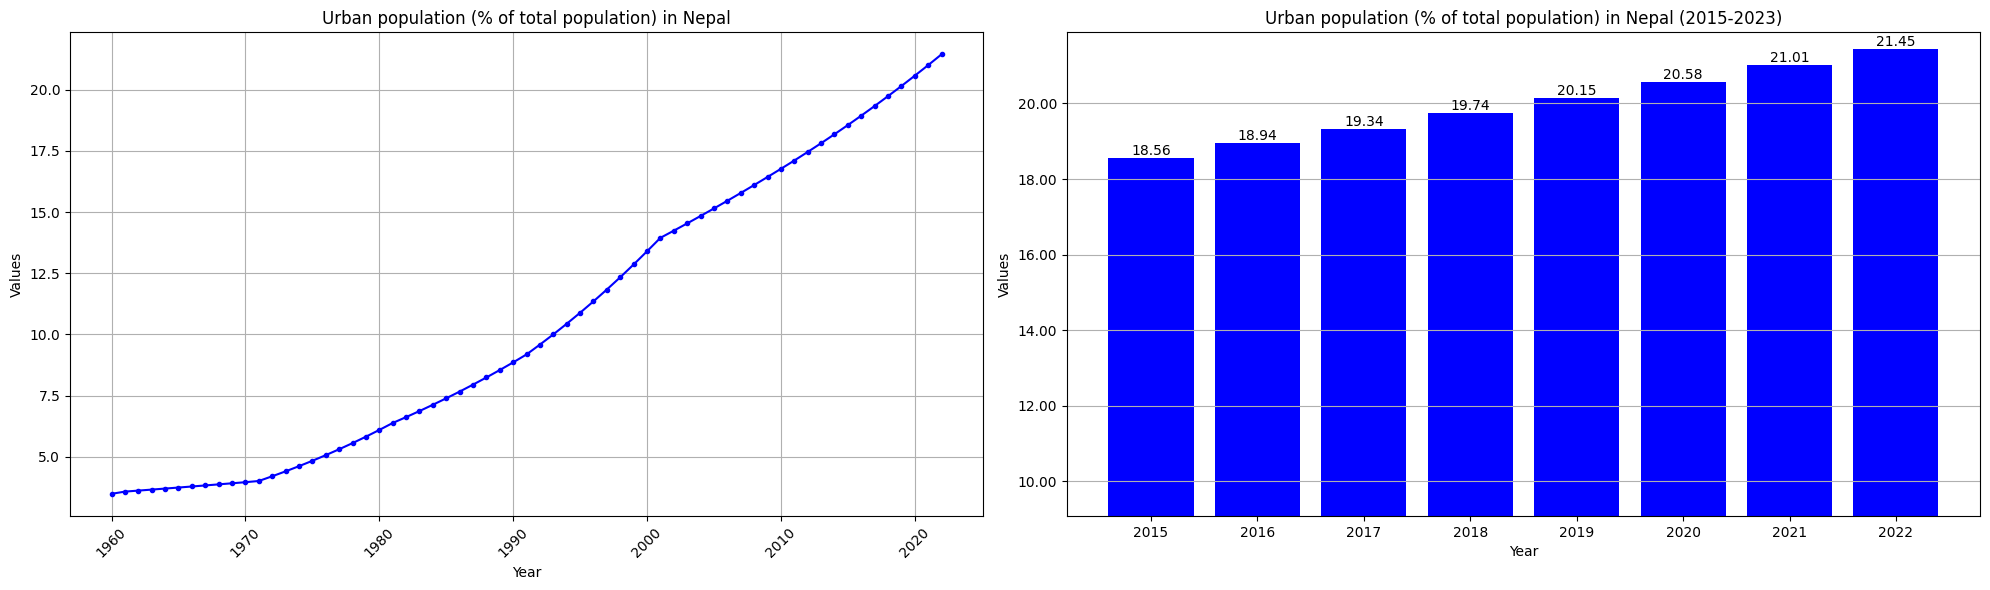

In [10]:
display_subplots(data, xticks_interval=10)

# Population density (people per sq. km of land area)

In [11]:
# Extract information for the current row that represent the population density
title, data, years, values = extract_row_info(df, 351)
print(title)
print(data)

Population density (people per sq. km of land area)
{'1960': None, '1961': 72.48352448, '1962': 73.92109091, '1963': 75.40361538, '1964': 76.94279021, '1965': 78.5521049, '1966': 80.21118182, '1967': 81.92712587, '1968': 83.70916783, '1969': 85.53758042, '1970': 87.42157343, '1971': 89.33475524, '1972': 91.27426573, '1973': 93.25848252, '1974': 95.28881818, '1975': 97.38140559, '1976': 99.51565035, '1977': 101.7512587, '1978': 104.1172727, '1979': 106.5633846, '1980': 109.094, '1981': 111.6768671, '1982': 114.3155524, '1983': 117.0675804, '1984': 119.8713986, '1985': 122.6613357, '1986': 125.433049, '1987': 128.1552727, '1988': 130.9143007, '1989': 133.8816573, '1990': 137.1785315, '1991': 140.7746783, '1992': 144.7701608, '1993': 148.7227902, '1994': 152.4108462, '1995': 155.983014, '1996': 159.3284545, '1997': 162.5833357, '1998': 165.7575385, '1999': 168.8332657, '2000': 171.3254273, '2001': 174.09188, '2002': 176.7155773, '2003': 179.1622463, '2004': 181.4019184, '2005': 183.363167

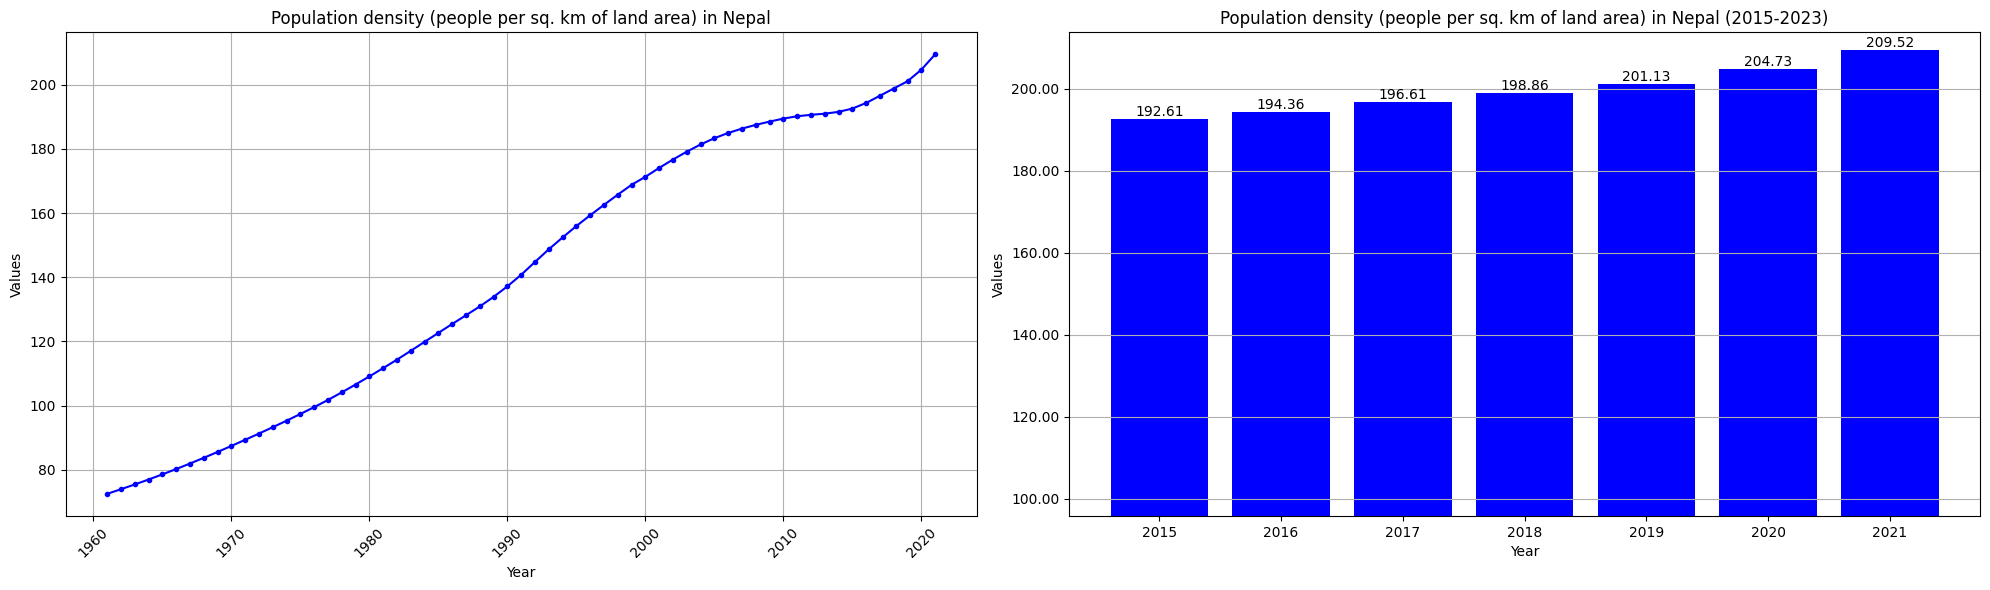

In [12]:
display_subplots(data, xticks_interval=10)

# Total Population ages 65 and above

In [13]:
# Extract information for the current row that represent total Population agles 65 and above
title, data, years, values = extract_row_info(df, 447)
print(title)
print(data)

Population ages 65 and above, total
{'1960': 302572.0, '1961': 311054.0, '1962': 319821.0, '1963': 328910.0, '1964': 338427.0, '1965': 348422.0, '1966': 358828.0, '1967': 369651.0, '1968': 380830.0, '1969': 392308.0, '1970': 404173.0, '1971': 416390.0, '1972': 428826.0, '1973': 441367.0, '1974': 454007.0, '1975': 466921.0, '1976': 480227.0, '1977': 493830.0, '1978': 507915.0, '1979': 522628.0, '1980': 537864.0, '1981': 553468.0, '1982': 569208.0, '1983': 584946.0, '1984': 600649.0, '1985': 616330.0, '1986': 632042.0, '1987': 647918.0, '1988': 664099.0, '1989': 681270.0, '1990': 699951.0, '1991': 720208.0, '1992': 742427.0, '1993': 764600.0, '1994': 786077.0, '1995': 807771.0, '1996': 829527.0, '1997': 852028.0, '1998': 875504.0, '1999': 899754.0, '2000': 924334.0, '2001': 949491.0, '2002': 977109.0, '2003': 1007162.0, '2004': 1038047.0, '2005': 1073142.0, '2006': 1113371.0, '2007': 1155868.0, '2008': 1199294.0, '2009': 1242368.0, '2010': 1284174.0, '2011': 1326173.0, '2012': 1371385.0,

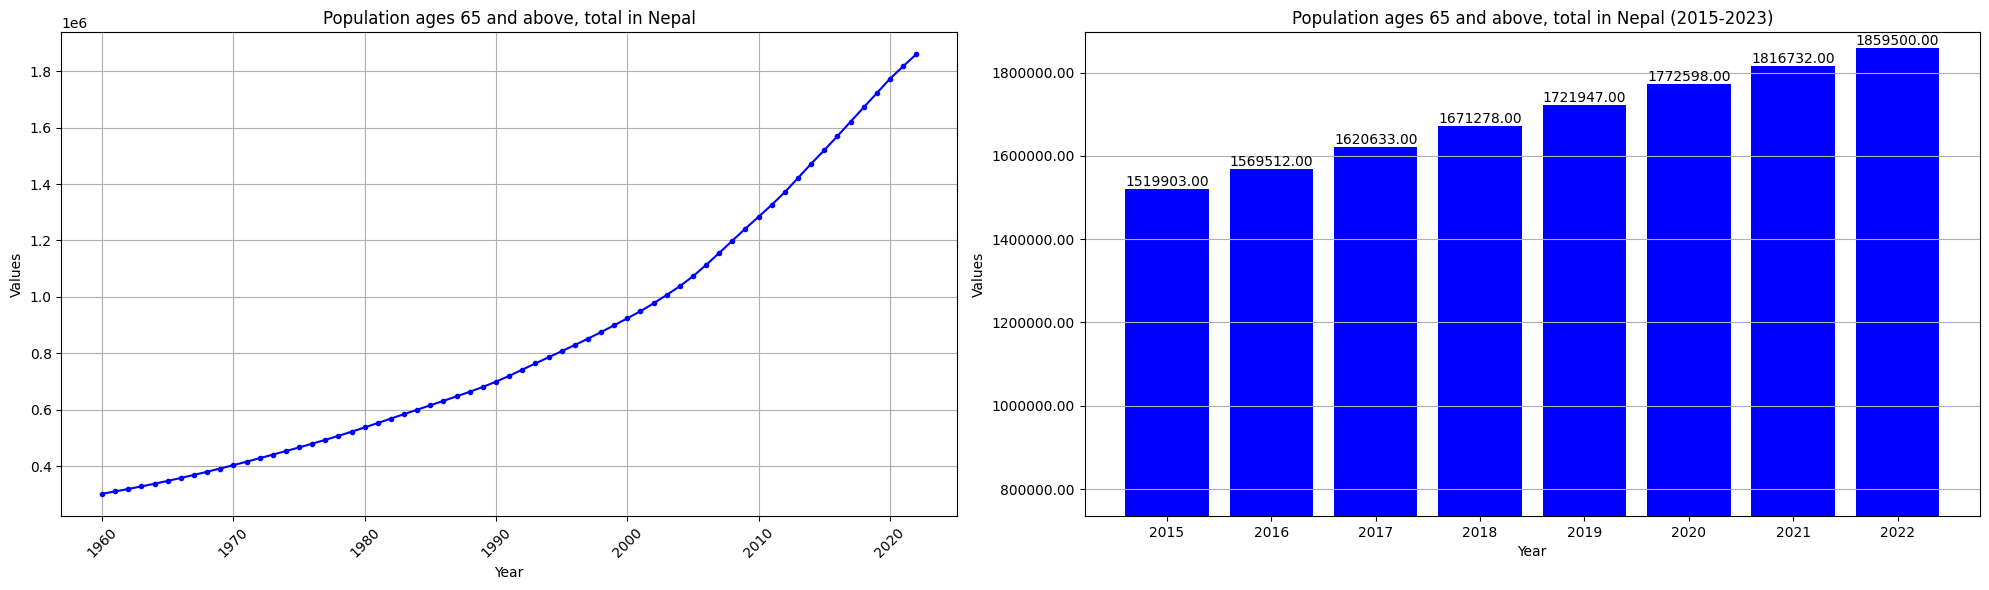

In [14]:
display_subplots(data, xticks_interval=10)